In [65]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from ydata_profiling import ProfileReport


In [66]:
df = pd.read_csv('spotify-2023.csv', encoding='latin-1')

In [67]:
df = df.dropna(subset=['key'])


In [68]:
df = df.rename(columns={'track_name': 'track', 'danceability_%': 'danceability', 'valence_%': 'valence', 'energy_%': 'energy', 'acousticness_%': 'acousticness', 'instrumentalness_%': 'instrumentalness', 'liveness_%': 'liveness', 'speechiness_%': 'speechiness' })

In [69]:
df['major'] = df['mode'].apply(lambda x: '1' if x == 'Major' else 0)
df['minor'] = df['mode'].apply(lambda x: '1' if x == 'Minor' else 0)


In [70]:
sorted_df = df.sort_values(by='streams', ascending= False)

In [71]:
sorted_df.head()

,track,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,major,minor
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,Major,53,75,69,7,0,17,3,1,0
33,Anti-Hero,Taylor Swift,1,2022,10,21,9082,56,999748277,242,...,Major,64,51,63,12,0,19,5,1,0
625,Arcade,Duncan Laurence,1,2019,3,7,6646,0,991336132,107,...,Minor,45,27,33,82,0,14,4,0,1
253,Glimpse of Us,Joji,1,2022,6,10,6330,6,988515741,109,...,Major,44,27,32,89,0,14,5,1,0
455,Seek & Destroy,SZA,1,2022,12,9,1007,0,98709329,5,...,Major,65,35,65,44,18,21,7,1,0


Danceability x In Spotify Playlists

In [74]:
df['danceability_bins'] = df.loc[:, 'danceability']


In [75]:
df['danceability_bins'] = pd.cut(df.danceability_bins, bins = [20,40,60,80,100], labels = ['20-40','40-60', '60-80', '80-100'])

In [77]:
grouped = df.groupby('danceability_bins').agg({
    'in_spotify_playlists': 'count'
}).reset_index()
print(grouped)

  danceability_bins  in_spotify_playlists
0             20-40                    44
1             40-60                   227
2             60-80                   422
3            80-100                   165


VALENCE IN SPOTIFY PLAYLISTS\
Number [float]
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

Range: 0 - 1
Example: 0.428

In [132]:
key_counts = df['key'].value_counts()

In [86]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce').fillna(0).astype(int)


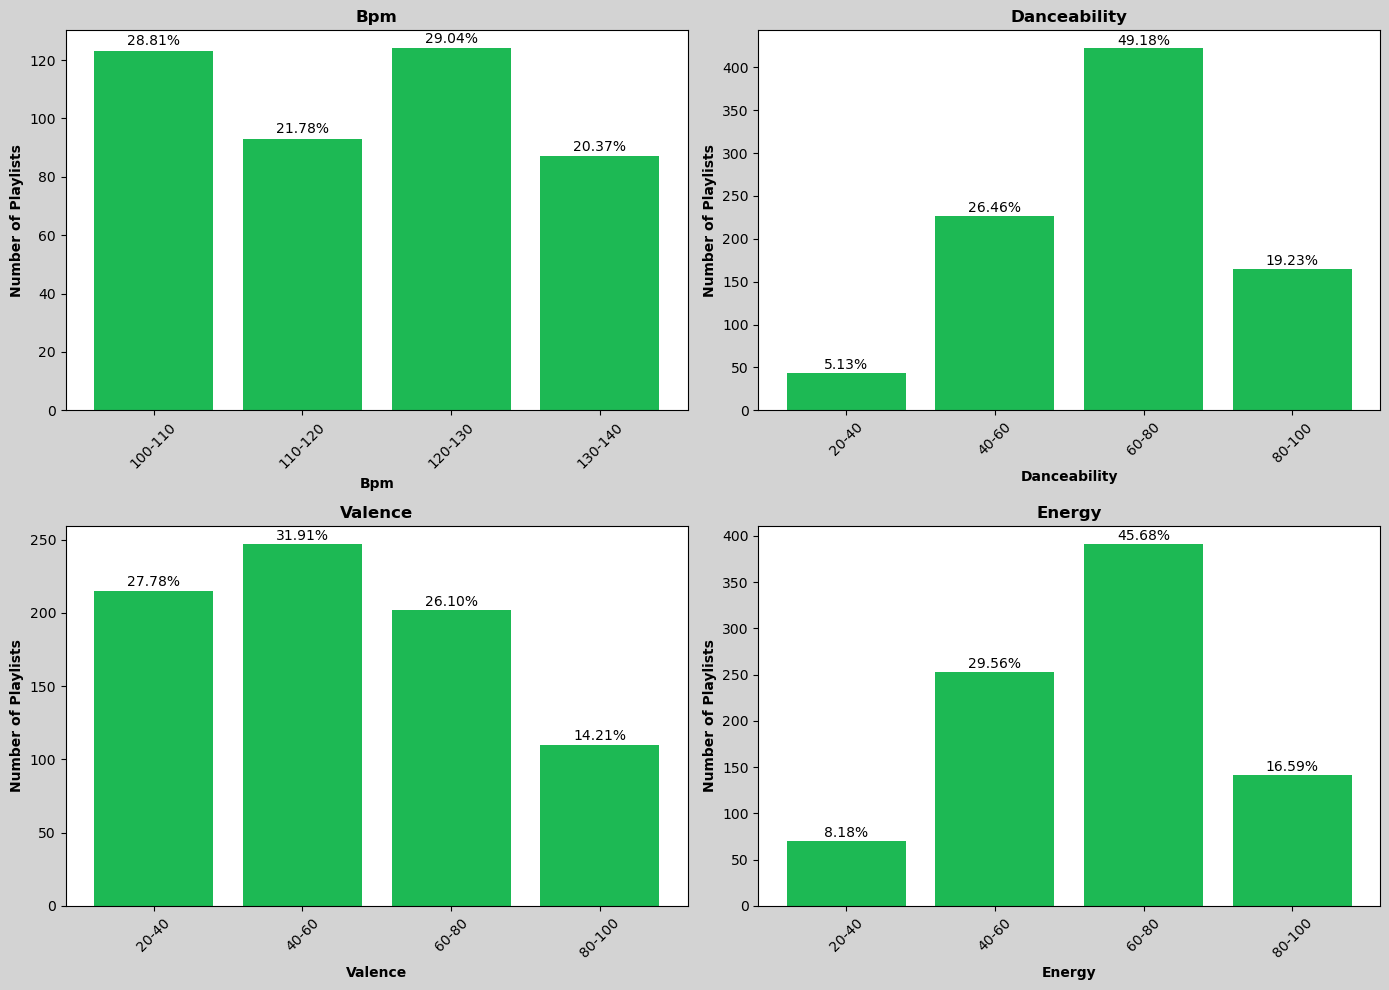

In [121]:

continuous_features = ['bpm', 'danceability', 'valence', 'energy']
bins_dict = {
    'bpm': [100, 110, 120, 130, 140],
    'danceability': [20, 40, 60, 80, 100],
    'valence': [20, 40, 60, 80, 100],
    'energy': [20, 40, 60, 80, 100]
}

labels_dict = {
    'bpm': ['100-110', '110-120', '120-130', '130-140'],
    'danceability': ['20-40', '40-60', '60-80', '80-100'],
    'valence': ['20-40', '40-60', '60-80', '80-100'],
    'energy': ['20-40', '40-60', '60-80', '80-100']
}

def analyze_feature_bins(ax, df, feature, bins, labels):
  
    binned_feature = f'{feature}_bins'
    
    df[feature] = df[feature].astype(int)
    
    # Binning the feature
    df[binned_feature] = pd.cut(df[feature], bins=bins, labels=labels, include_lowest=True)
    
    # Grouping by the binned feature and counting occurrences
    grouped = df.groupby(binned_feature).agg({
        'in_spotify_playlists': 'count'
    }).reset_index()
    grouped.columns = [binned_feature, 'count']
    
    total_count = grouped['count'].sum()
    
    # Barplotting
    bars = ax.bar(grouped[binned_feature], grouped['count'], color='#1DB954')

    for bar in bars:
        yval = bar.get_height()
        percentage = (yval / total_count) * 100
        ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{percentage:.2f}%", 
                ha='center', va='bottom', fontsize=10) 

    ax.set_xlabel(f'{feature.capitalize()}', fontsize=10, fontweight='bold')
    ax.set_ylabel('Number of Playlists', fontsize=10, fontweight='bold')
    ax.set_title(f'{feature.capitalize()}', fontsize=12, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), facecolor='#d3d3d3')

# Flatten axes array for easier iteration
axes = axes.flatten()

# Process and plot continuous features
for i, feature in enumerate(continuous_features):
    analyze_feature_bins(axes[i], df, feature, bins_dict[feature], labels_dict[feature])

# Adjust layout
plt.tight_layout()
plt.show()

KEY\
integer\
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.


Hypothesis # 2: what are the different attributes that songs that made it to top 10 and top 50 have? 

In [87]:
df.dtypes

track                      object
artist(s)_name             object
artist_count                int64
released_year               int64
released_month              int64
released_day                int64
in_spotify_playlists        int64
in_spotify_charts           int64
streams                     int32
in_apple_playlists          int64
in_apple_charts             int64
in_deezer_playlists        object
in_deezer_charts            int64
in_shazam_charts           object
bpm                         int64
key                        object
mode                       object
danceability                int64
valence                     int64
energy                      int64
acousticness                int64
instrumentalness            int64
liveness                    int64
speechiness                 int64
major                      object
minor                      object
danceability_bins        category
valence_bins             category
bpm_bins                 category
energy_bins   

In [88]:
sorted_df = df.sort_values(by='streams', ascending= False)
sorted_df.head()

,track,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,major,minor,danceability_bins,valence_bins,bpm_bins,energy_bins,acousticness_bins,instrumentalness_bins,liveness_bins,speechiness_bins
189,Take Me To Church,Hozier,1,2013,9,13,23804,31,2135158446,187,...,0,1,40-60,40-60,60-80,60-80,60-80,NaN,0-20,0-20
762,Love Yourself,Justin Bieber,1,2015,11,9,22730,5,2123309722,289,...,1,0,60-80,40-60,40-60,20-40,80-100,NaN,20-40,40-60
623,All of Me,John Legend,1,2013,8,1,27221,0,2086124197,308,...,1,0,40-60,20-40,40-60,20-40,80-100,NaN,0-20,0-20
157,Counting Stars,OneRepublic,1,2013,1,1,29215,43,2011464183,179,...,0,1,60-80,40-60,60-80,60-80,0-20,NaN,0-20,0-20
80,Riptide,Vance Joy,1,1975,1,1,31123,55,2009094673,300,...,1,0,40-60,40-60,40-60,60-80,40-60,NaN,0-20,0-20


In [89]:
top_50_df = sorted_df.head(50)
top_10_df = sorted_df.head(10)

In [90]:

top_10_df = sorted_df.head(10)
top_50_df = sorted_df.head(50)

# List of features to analyze
features = ['bpm', 'key', 'major', 'minor', 'danceability', 'valence', 'energy', 'acousticness', 
            'instrumentalness', 'liveness', 'speechiness']

# Calculate descriptive statistics for top 10
top_10_stats = top_10_df[features].describe().T
top_10_stats['mode'] = top_10_df[features].mode().iloc[0]

print("Top 10 Descriptive Statistics:")
print(top_10_stats)

# Calculate descriptive statistics for top 50
top_50_stats = top_50_df[features].describe().T
top_50_stats['mode'] = top_50_df[features].mode().iloc[0]

print("\nTop 50 Descriptive Statistics:")
print(top_50_stats)

Top 10 Descriptive Statistics:
                  count   mean        std    min     25%    50%     75%  \
bpm                10.0  128.3  20.666935  100.0  120.50  124.0  141.75   
danceability       10.0   61.6  14.469892   42.0   53.75   59.0   65.25   
valence            10.0   54.8  16.060995   33.0   43.50   51.5   64.25   
energy             10.0   65.7  20.456186   26.0   61.50   68.5   76.75   
acousticness       10.0   32.3  36.132626    0.0    3.25   17.0   58.00   
instrumentalness   10.0    0.0   0.000000    0.0    0.00    0.0    0.00   
liveness           10.0   13.4   5.699903    8.0   10.25   12.0   14.50   
speechiness        10.0   11.4  12.384578    3.0    4.25    6.5   11.75   

                    max   mode  
bpm               166.0  124.0  
danceability       91.0     42  
valence            88.0     33  
energy             93.0   66.0  
acousticness       92.0    0.0  
instrumentalness    0.0    0.0  
liveness           28.0   12.0  
speechiness        44.0    4.

c:\Users\Lenovo\anaconda3\envs\pandas_prof\lib\site-packages\pandas\core\algorithms.py:968: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  warn(f"Unable to sort modes: {err}")
c:\Users\Lenovo\anaconda3\envs\pandas_prof\lib\site-packages\pandas\core\algorithms.py:968: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  warn(f"Unable to sort modes: {err}")


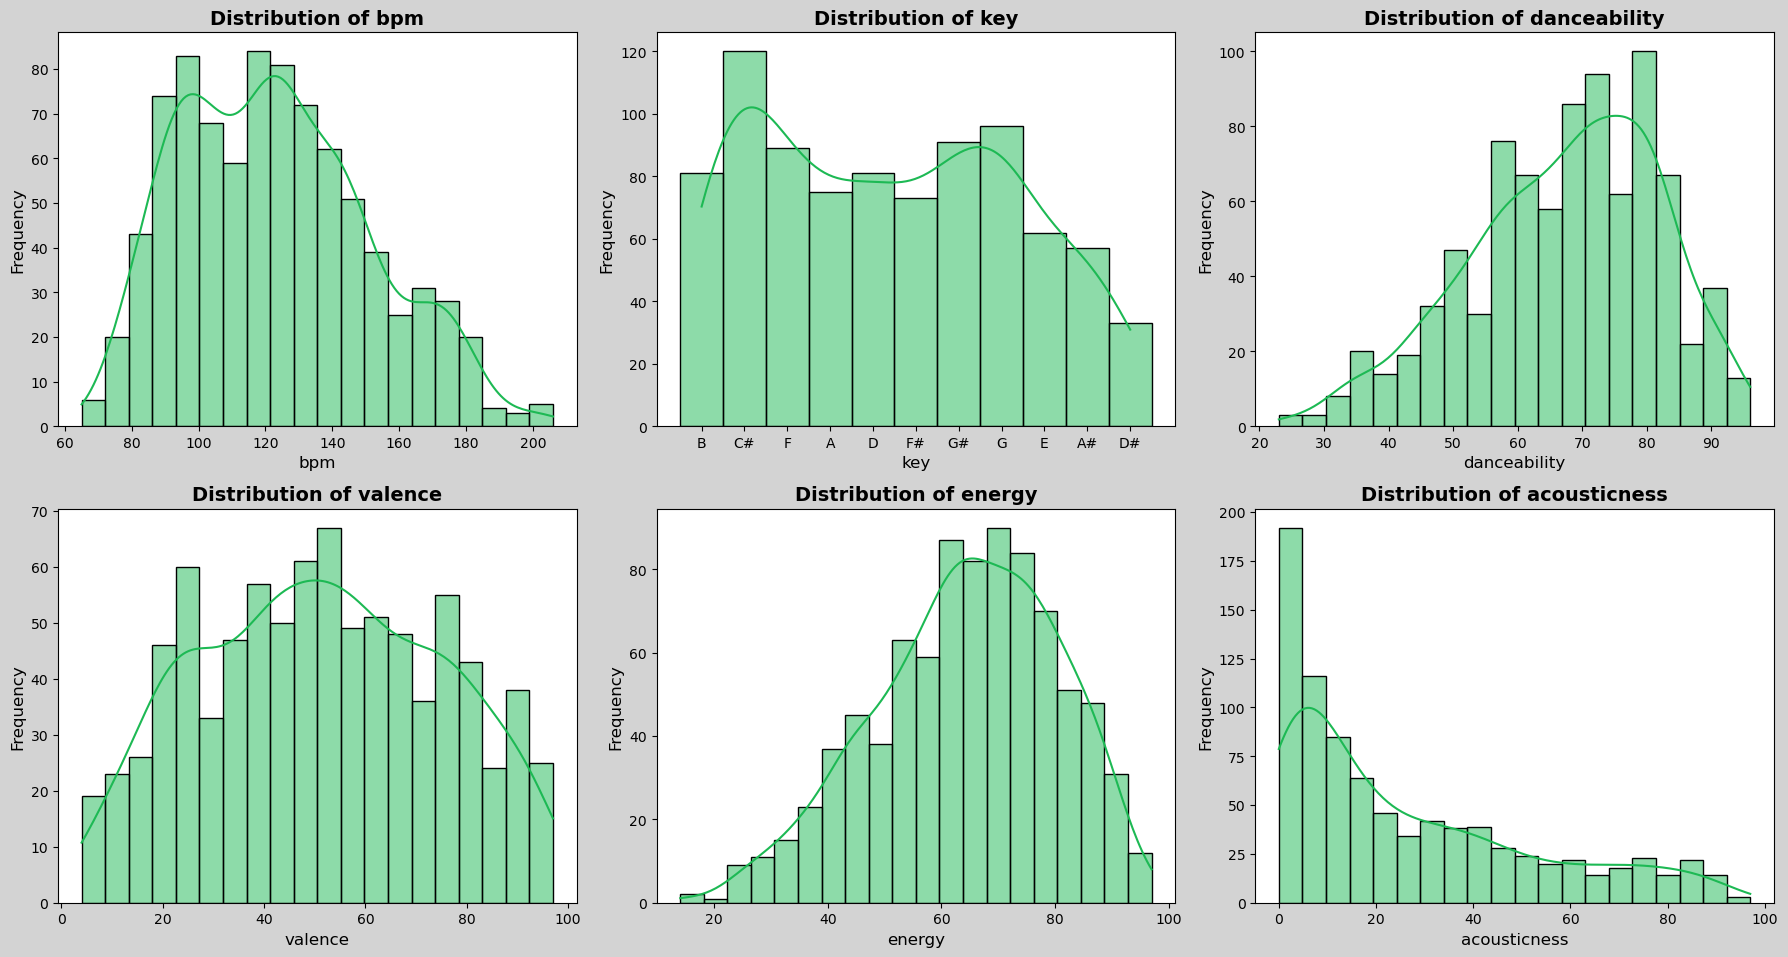

In [91]:

plt.figure(figsize=(18, 14), facecolor='#d3d3d3')

columns_to_plot = ['bpm', 'key', 'danceability', 'valence', 'energy', 'acousticness'] 

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot (3,3,i)
    sns.histplot(data=df, x=column, bins=20, color='#1DB954', kde=True)
    plt.title(f'Distribution of {column}', fontsize=14, fontweight='bold' )
    plt.xlabel(column, fontsize=12,)
    plt.ylabel('Frequency', fontsize=12)
                  
plt.tight_layout()
plt.show()

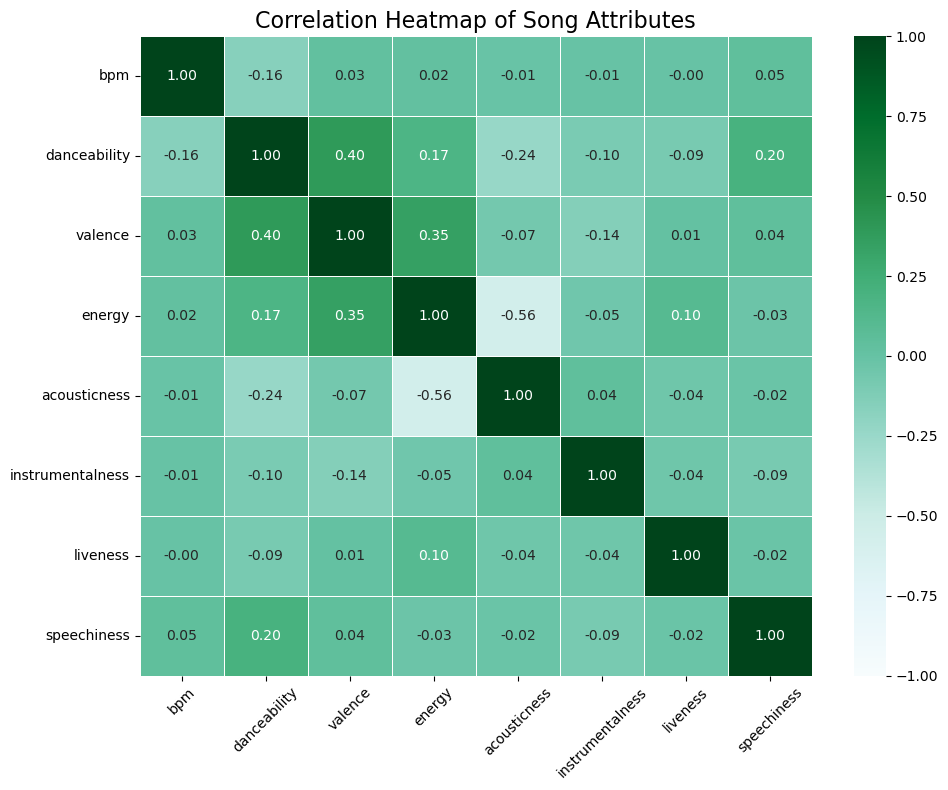

In [128]:
columns_to_include = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']
df_filtered = df[columns_to_include]
corr_matrix = df_filtered.corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='BuGn', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation Heatmap of Song Attributes', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [127]:
print(corr_matrix)

                       bpm  danceability   valence    energy  acousticness  \
bpm               1.000000     -0.161281  0.026882  0.015911     -0.012354   
danceability     -0.161281      1.000000  0.396207  0.165901     -0.239009   
valence           0.026882      0.396207  1.000000  0.346939     -0.066854   
energy            0.015911      0.165901  0.346939  1.000000     -0.561699   
acousticness     -0.012354     -0.239009 -0.066854 -0.561699      1.000000   
instrumentalness -0.005166     -0.098955 -0.144301 -0.050383      0.043474   
liveness         -0.003060     -0.093731  0.010722  0.103557     -0.043107   
speechiness       0.046743      0.197493  0.039952 -0.025579     -0.019154   

                  instrumentalness  liveness  speechiness  
bpm                      -0.005166 -0.003060     0.046743  
danceability             -0.098955 -0.093731     0.197493  
valence                  -0.144301  0.010722     0.039952  
energy                   -0.050383  0.103557    -0.025579

Seasonal trends: when do hits drop? \
Group by Month: Aggregate data by the month of release and calculate the average number of playlists songs appear in. \
Visualization: Use bar charts to display this data.

In [93]:
release_counts = df['released_month'].value_counts().sort_index()
print(release_counts)

1     121
2      54
3      76
4      63
5     118
6      78
7      51
8      41
9      51
10     66
11     69
12     70
Name: released_month, dtype: int64


In [94]:
month_and_key = df.groupby(['released_month', 'key']).size().unstack(fill_value=0)
month_and_key = month_and_key.reset_index()
print(month_and_key)


key  released_month   A  A#   B  C#   D  D#   E   F  F#   G  G#
0                 1  11  12   5  14  17   3   8  15  12  11  13
1                 2   7   0   8  10   6   1   3   4   3   7   5
2                 3   6   2   7  11  10   3   4  11   8   9   5
3                 4   6   7   4   9   4   1   4   3   9   9   7
4                 5  11  10  18  15   3   8   9  11   9  10  14
5                 6  10   4   9  15   4   3   2  10   7   6   8
6                 7   3   3   4   6   3   2   5   7   7   7   4
7                 8   4   2   5   5   3   3   4   2   3   3   7
8                 9   2   6   7   8  10   1   3   5   0   5   4
9                10   6   4   5   5   7   3  11   5   4   9   7
10               11   4   2   7  13   7   3   6   7   5   7   8
11               12   5   5   2   9   7   2   3   9   6  13   9


In [95]:
month_and_mode = df.groupby(['released_month', 'mode']).size().unstack(fill_value=0)
month_and_mode = month_and_mode.reset_index()
print(month_and_mode)

mode  released_month  Major  Minor
0                  1     62     59
1                  2     25     29
2                  3     43     33
3                  4     39     24
4                  5     59     59
5                  6     37     41
6                  7     31     20
7                  8     24     17
8                  9     30     21
9                 10     41     25
10                11     45     24
11                12     39     31


In [96]:
df['major'].fillna(0, inplace=True)
df['minor'].fillna(0, inplace=True)

In [97]:
df['major'] = pd.to_numeric(df['major'], errors='coerce')
df['minor'] = pd.to_numeric(df['minor'], errors='coerce')

In [98]:
seasons_mapping = {12: 'Winter', 1:'Winter', 2:'Winter', 3:'Spring', 4:'Spring', 
                   5:'Spring', 6:'Summer', 7:'Summer', 8:'Summer', 9:'Autumn', 10:'Autumn', 11:'Autumn'}

In [99]:
df['season'] = df['released_month'].map(seasons_mapping)

seasonal_distribution = df.groupby('season')['major', 'minor'].sum

print(seasonal_distribution)

<bound method GroupBy.sum of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x00000224E14841C0>>


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16448\1797401376.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  seasonal_distribution = df.groupby('season')['major', 'minor'].sum


In [100]:
seasons_mapping = {12: 'Winter', 1:'Winter', 2:'Winter', 3:'Spring', 4:'Spring', 
                   5:'Summer', 6:'Summer', 7:'Summer', 8:'Summer', 9:'Autumn', 10:'Autumn', 11:'Autumn'}


In [101]:
df['season'] = df['released_month'].map(seasons_mapping)

# Group by season and aggregate Major and Minor counts
seasonal_distribution = df.groupby('season').agg({
    'major': 'sum',
    'minor': 'sum'
}).reset_index()

print(seasonal_distribution)

   season  major  minor
0  Autumn    116     70
1  Spring     82     57
2  Summer    151    137
3  Winter    126    119


In [102]:
#Group by month: 
grouped_months = df.groupby('released_month').agg({
    'in_spotify_playlists': 'mean'
}).reset_index()
print(grouped_months)

    released_month  in_spotify_playlists
0                1          10826.231405
1                2           3570.296296
2                3           4024.842105
3                4           3161.793651
4                5           3276.822034
5                6           3592.205128
6                7           3652.921569
7                8           5877.878049
8                9           8256.431373
9               10           5393.787879
10              11           5474.797101
11              12           2953.300000


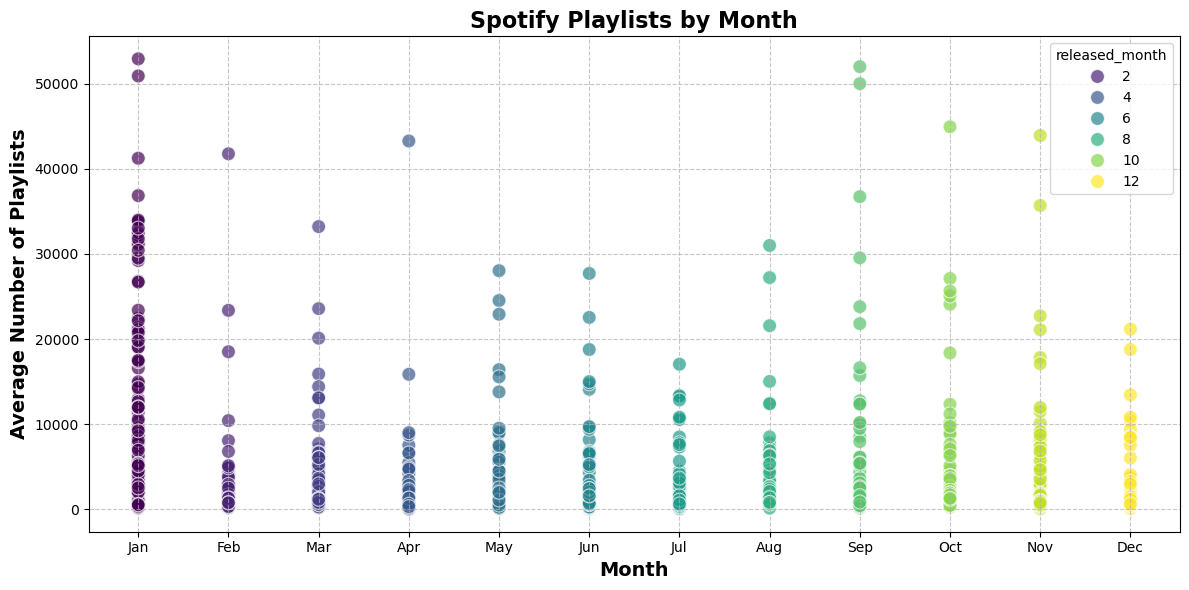

In [129]:

plt.figure(figsize=(12, 6))

# Create the scatter plot
sns.scatterplot(data=df, x='released_month', y='in_spotify_playlists', hue='released_month', palette='viridis', s=100, edgecolor='w', alpha=0.7)

# Customize the plot
plt.title('Spotify Playlists by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('Average Number of Playlists', fontsize=14, fontweight='bold')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [125]:
key_counts = df['key'].value_counts()
key_counts

C#    120
G      96
G#     91
F      89
B      81
D      81
A      75
F#     73
E      62
A#     57
D#     33
Name: key, dtype: int64

In [106]:
top_keys = key_counts.head(5).index
print(top_keys)

df_top_keys = df[df['key'].isin(top_keys)]

key_counts_by_season =df_top_keys.groupby(['season', 'key']).size().reset_index(name='count')

key_counts_by_season

Index(['C#', 'G', 'G#', 'F', 'B'], dtype='object')


,season,key,count
0,Autumn,B,19
1,Autumn,C#,26
2,Autumn,F,17
3,Autumn,G,21
4,Autumn,G#,19
5,Spring,B,11
6,Spring,C#,20
7,Spring,F,14
8,Spring,G,18
9,Spring,G#,12


In [130]:
count_df = df.groupby(['season', 'mode']).size().reset_index(name='count')
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']

# Convert 'season' to a categorical type
count_df['season'] = pd.Categorical(count_df['season'], categories=season_order, ordered=True)
count_df = count_df.sort_values('season')

print(count_df)


   season   mode  count
6  Winter  Major    126
7  Winter  Minor    119
2  Spring  Major     82
3  Spring  Minor     57
4  Summer  Major    151
5  Summer  Minor    137
0  Autumn  Major    116
1  Autumn  Minor     70


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16448\3954542064.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=count_df, x='season', y='count', hue='mode', marker='o',


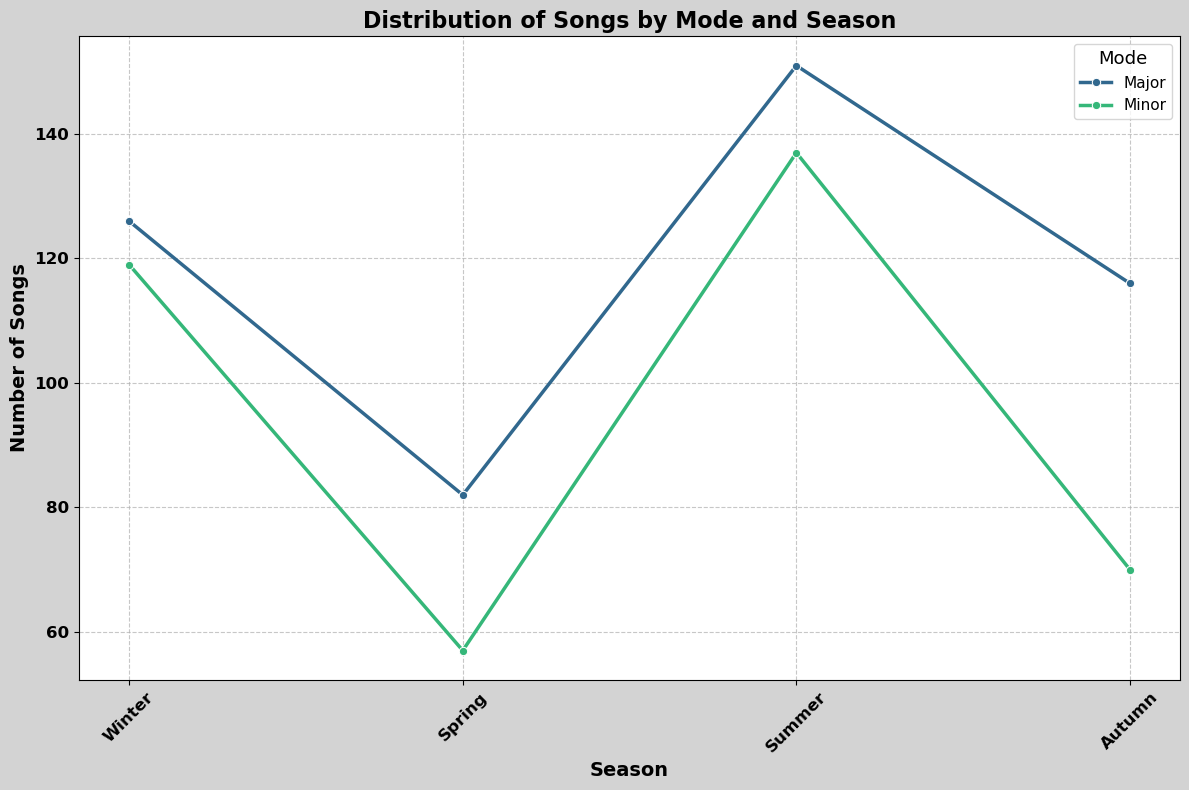

In [131]:

plt.figure(figsize=(12, 8), facecolor='#d3d3d3')

sns.lineplot(data=count_df, x='season', y='count', hue='mode', marker='o',
             linewidth=2.5, palette='viridis', ci=None, estimator='mean')

plt.title('Distribution of Songs by Mode and Season', fontsize=16, fontweight='bold')
plt.xlabel('Season', fontsize=14, fontweight='bold')
plt.ylabel('Number of Songs', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

#legend
plt.legend(title='Mode', title_fontsize='13', fontsize='11', loc='best')

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

In [ ]:
df.head()

,track,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,danceability_bins,valence_bins,bpm_bins,energy_bins,acousticness_bins,instrumentalness_bins,liveness_bins,speechiness_bins,Season,season
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,60-80,80-100,60-80,80-100,20-40,NaN,0-20,0-20,Summer,Summer
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,60-80,60-80,40-60,60-80,0-20,NaN,0-20,0-20,Spring,Spring
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,40-60,20-40,60-80,40-60,0-20,NaN,20-40,0-20,Summer,Summer
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,40-60,40-60,80-100,60-80,0-20,NaN,0-20,0-20,Summer,Summer
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,60-80,20-40,60-80,60-80,0-20,60-80,0-20,0-20,Spring,Spring
